# Multi-Class Classification with Perceptron

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [25]:
import random
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [5]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

#accuracy(wts, test_x, test_labels)

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [6]:
!rm -f mnist.pkl.gz mnist.pkl
!wget https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

--2025-05-19 15:32:41--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2025-05-19 15:32:41--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17051982 (16M) [application/octet-stream]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  16.26M  75.4MB/s    in 0.2s    

2025-05-19 15:32:41 (75.4 MB/s) -

In [ ]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle,encoding='latin1')
print(type(MNIST))
(train_images, train_labels) = MNIST[0] 
(test_images, test_labels) = MNIST[1] 

<class 'tuple'>


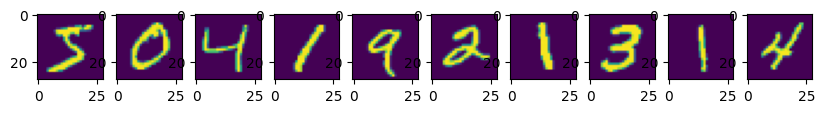

In [18]:
features = train_images.astype(np.float32) / 256.0
labels = train_labels
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    plt.imshow(features[i].reshape(28,28))
plt.show()

Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.

In [26]:
def set_mnist_pos_neg(positive_label):
    positive_indices = [i for i, j in enumerate(train_labels) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(train_labels)
                          if j != positive_label]

    positive_images = train_images[positive_indices]
    negative_images = train_images[negative_indices]

    return positive_images, negative_images

Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.

###Homework

Trainning of the 10 perceptrons

In [27]:
weights= [ train(*set_mnist_pos_neg(x)) for x in range(10)]

Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.971816707218167, neg correct=0.6792624478565723
Iteration=20, pos correct=0.46370640713706407, neg correct=0.9973151681902902
Iteration=30, pos correct=0.8890916463909164, neg correct=0.9608591461791072
Iteration=40, pos correct=0.9789132197891321, neg correct=0.7707464276204846
Iteration=50, pos correct=0.9377534468775345, neg correct=0.9260228987308068
Iteration=60, pos correct=0.9884428223844283, neg correct=0.7026715185941245
Iteration=70, pos correct=0.9387672343876723, neg correct=0.9227389722197568
Iteration=80, pos correct=0.8079886455798865, neg correct=0.9768350048815124
Iteration=90, pos correct=0.927007299270073, neg correct=0.9572202005857815
Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.9950686861570975, neg correct=0.6124723613555345
Iteration=20, pos correct=0.9827404015498415, neg correct=0.8736519110148459
Iteration=30, pos correct=0.9982388164846777, neg correct=0.58

Define `classify` function to perform digit classification

In [ ]:
def classify(image):
    best_choice=0
    best_choice_index=0
    for x in range(10):
        
        z=np.dot(image,weights[x])
        if z>0 and z>best_choice:
            best_choice=z
            best_choice_index=x
    return best_choice_index


 Measure the accuracy of classification and print *confusion matrix*

In [47]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
predictions=[ classify(image) for image in test_images]

matriz=confusion_matrix(test_labels,predictions)
print(matriz)

[[ 782    0    1   16    1  156    7    1   22    5]
 [   3 1002    0    2    0   40    0    0   14    3]
 [ 130   58  547   60   18   42   16   17   56   46]
 [   9    6    4  758    0  168    9    1   45   30]
 [  14    9    1    5  704   40    0   17    1  192]
 [  11   13    1   70    4  737   11    2   48   18]
 [  88   27   10    1   22  111  698    5    2    3]
 [  24   21    0   15   16   35    0  768    1  210]
 [  54   67    0   47    1  383    3    5  364   85]
 [  18   10    0   15   24   46    0   35    3  810]]
